動作環境：  
Google Colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install lingam
!pip install numpy==1.26.0
!pip install threadpoolctl

# 必要なライブラリーのインポート
import pandas as pd
import numpy as np

import graphviz
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

In [2]:
import numpy
import scipy

print(f"NumPy version: {numpy.__version__}")
print(f"SciPy version: {scipy.__version__}")

NumPy version: 1.26.0
SciPy version: 1.11.4


In [8]:
lingam_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/lingam_df.csv")
lingam_df.head()

,構想区域人口,手術総数,救急車の受入件数,施設全体_医師_常勤,新規入棟患者数のうち施設からの入院の割合,新規入棟患者数のうち他病棟、他院から転棟の割合,新規入棟患者のうち夜間・時間外に受診診察後直ちに入院となった患者の割合,病床利用率,平均存棟日数,院内総病床数,病床数の全体に占める割合,構想区域人口あたりの医師数,構想区域内の救急車受入数の最大割合
0,667767,1362.0,2725,43,0.000000,28.312413,9.417040,94.659938,10.948714,328,34.756098,1.872959,25.406317
1,771746,2333.0,3653,71,5.129466,5.391675,12.159843,67.179795,13.368430,400,80.000000,4.576506,8.977672
2,735278,582.0,0,11,0.000000,0.062578,0.000000,53.721461,5.878826,48,100.000000,1.100264,28.158005
3,1155470,55.0,60,3,2.017937,6.053812,5.208333,93.753425,23.226244,54,55.555556,3.779068,4.681258
4,3777491,86.0,0,3,0.000000,0.000000,10.844749,53.808219,4.484018,20,100.000000,1.054112,8.412693


In [5]:
def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.5
    dirs = np.where(idx)
    d = graphviz.Digraph(format='png', engine='dot')
    # フォント設定
    d.attr('node', fontname="MS Gothic", fontsize="10")
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=f'{coef:.2f}', fontsize="10")
    return d

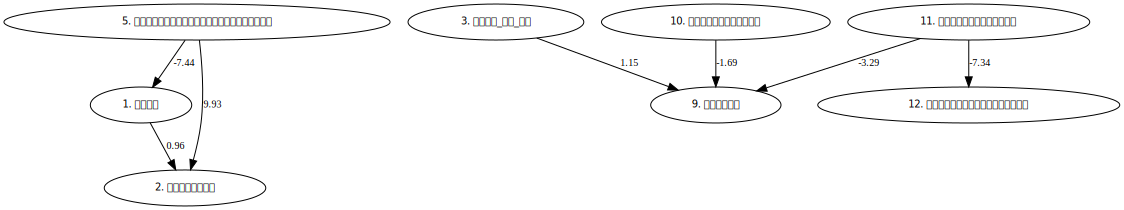

In [9]:
# 因果グラフの図示
import matplotlib.pyplot as plt

model = lingam.DirectLiNGAM()
model.fit(lingam_df)

labels = [f'{i}. {col}' for i, col in enumerate(lingam_df.columns)]
display(make_graph(model.adjacency_matrix_, labels))